In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [5]:
df = pd.read_csv('/content/Supply-Chain-Data-CSDL-updateted.csv')
df

,Product Type,Price,Customer Demographics,Shipping Costs,Revenue,Origin of goods,Duration of use,Natural Ingredients,Invest
0,Cosmetic,<30$,Male,0%,>15%,Europe,6 months,>80%,No
1,Skincare,<30$,Female,0%,>15%,Asia,12 months,<50%,No
2,Haircare,<30$,Male,0%,0-15%,Europe,12 months,>80%,Yes
3,Cosmetic,30-60$,Male,2%,0-15%,Asia,12 months,>80%,No
4,Skincare,>60$,Male,2%,>15%,Europe,6 months,<50%,No
5,Skincare,30-60$,Both,1%,>15%,Asia,12 months,<50%,No
6,Haircare,<30$,Female,1%,0-15%,Asia,6 months,>80%,No
7,Cosmetic,>60$,Both,2%,>15%,Europe,12 months,50-80%,No
8,Haircare,<30$,Both,0%,>15%,Asia,12 months,50-80%,No
9,Skincare,>60$,Male,1%,0-15%,Asia,6 months,>80%,Yes


In [6]:
def find_entropy(df):
    Class = df.keys()[-1]
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log10(fraction)
    return entropy

In [7]:
def entropy_attribute(df,attribute):
    Class = df.keys()[-1]
    target_variables = df[Class].unique()
    variables = df[attribute].unique()
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
                num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
                den = len(df[attribute][df[attribute]==variable])
                fraction = num/(den+eps)
                entropy += -fraction*np.log10(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

In [8]:
def information_gain(df):
    IG = []
    for key in df.keys()[:-1]:
        IG.append(entropy(df)-entropy_attribute(df,key))
    return IG, df.keys()[np.argmax(IG)]

In [9]:
def get_subtable(df, node, value):
    df2 = df[df[node] == value].reset_index(drop=True)
    df2.drop(node,axis=1,inplace=True)
    return df2

In [10]:

def buildTree(df,tree=None):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name

    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}

   #We make loop to construct a tree by calling this function recursively.
    #In this we check if the subset is pure and stops if it is pure.

    for value in attValue:

        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[Class],return_counts=True)

        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively

    return tree

    return tree

In [11]:
t = buildTree(df)
import pprint
pprint.pprint(t)

NameError: name 'find_winner' is not defined

In [12]:
import pydot
import uuid

def generate_unique_node():
    """ Generate a unique node label."""
    return str(uuid.uuid1())

def create_node(graph, label, shape='cylinder'):
    node = pydot.Node(generate_unique_node(), label=label, shape=shape)
    graph.add_node(node)
    return node

def create_edge(graph, node_parent, node_child, label):
    link = pydot.Edge(node_parent, node_child, label=label)
    graph.add_edge(link)
    return link

def walk_tree(graph, dictionary, prev_node=None):
    """ Recursive construction of a decision tree stored as a dictionary """
    for parent, child in dictionary.items():
        # root
        if not prev_node:
            root = create_node(graph, parent)
            walk_tree(graph, child, root)
            continue

        # node
        if isinstance(child, dict):
            for p, c in child.items():
                n = create_node(graph, p)
                create_edge(graph, prev_node, n, str(parent))
                walk_tree(graph, c, n)

        # leaf
        else:
            leaf = create_node(graph, str(child), shape='box3d')
            create_edge(graph, prev_node, leaf, str(parent))

tree={'Product Type': {'Cosmetic':  'NO',
                   	'Skincare': {'Natural ingredients' :{ '< 30%' :'YES',
                    	'50-80': {'Customer Demographics': {'both': {'Revenue': {'9-15%': 'NO',
                                                                             	'> 15%': 'YES'}},
                                                                 	'Male'  : 'YES',
                                                                 	'Female': 'NO'}},
                               	'< 80%'   :'NO'}},
                   	'Haircare': {'Price': {'< 30$': {'Original of goods':{'Asia'  : 'NO',
                                                                         	'Europe': 'YES'}},
                                          	'30-80$': 'YES',
                                          	'> 80$': {'Shipping cost': {'2%': {'Duration of Use':{'6 months'  : 'NO',
                                                                                                	'>12 months': 'YES'}},
                                                                      	'0%': 'YES',
                                                                      	'1%': 'NO'}},
                                                                         	}}}}
# plot_tree(tree)

graph = pydot.Dot(graph_type='digraph')
walk_tree(graph, tree)

graph.write_png("DecisionTree.png")

Org image shape -->  (523, 899, 3)


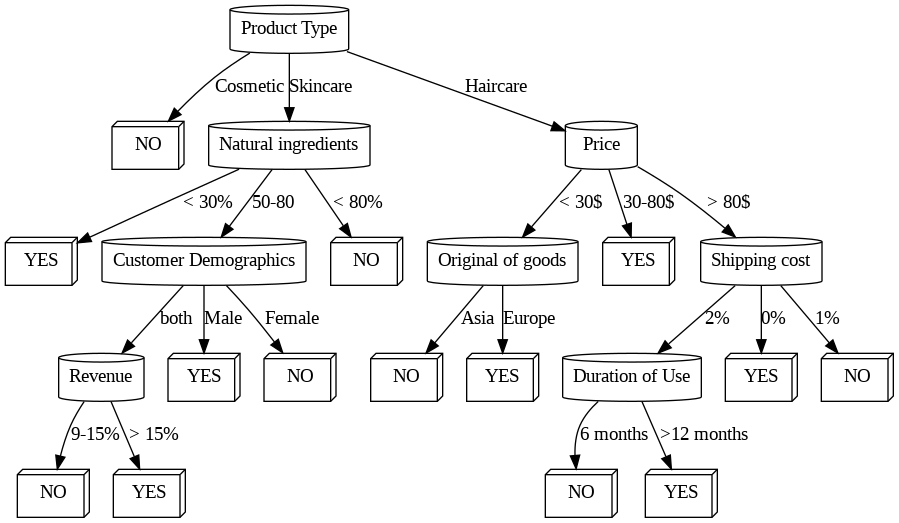

In [13]:
import cv2
from google.colab.patches import cv2_imshow
clusters = 5

path="/content/DecisionTree.png"
img = cv2.imread(path, 1)
org_img = img
print('Org image shape --> ',img.shape)
cv2_imshow(img)
cv2.destroyAllWindows()